In [51]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [53]:
from pandas_datareader import data


In [54]:
from datetime import datetime

In [55]:
from __future__ import division

In [56]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [57]:
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)
end
start

datetime.datetime(2021, 7, 4, 0, 0)

In [58]:
for stock in tech_list:
  globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [59]:
AAPL.describe()


,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,158.026972,154.315219,156.094383,156.229921,8.993289e+07,155.821763
std,12.812795,12.466263,12.698552,12.650569,2.665825e+07,12.665945
min,132.389999,129.039993,130.070007,130.059998,4.100000e+07,130.059998
25%,147.814995,145.254997,146.205002,146.254997,7.106150e+07,145.652504
50%,154.720001,150.639999,152.580002,152.509995,8.645310e+07,151.930588
75%,169.774994,165.525002,167.735001,166.894997,1.046532e+08,166.650146
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [60]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-07-06 to 2022-07-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

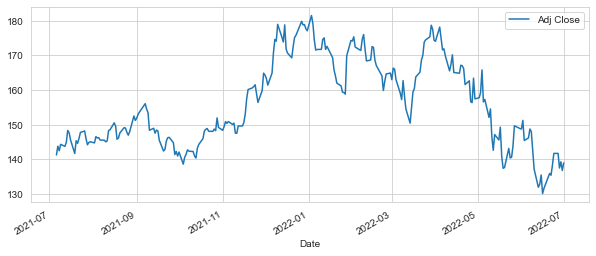

In [61]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))


<AxesSubplot:xlabel='Date'>

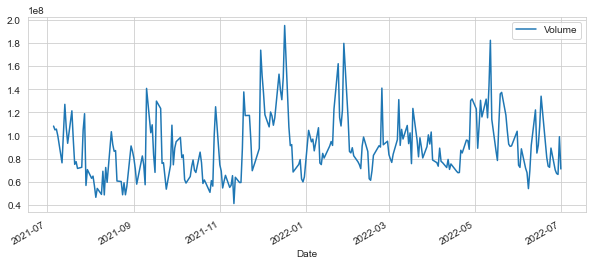

In [62]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [63]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()
   

<AxesSubplot:xlabel='Date'>

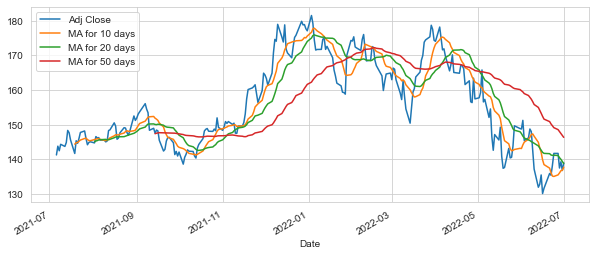

In [64]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

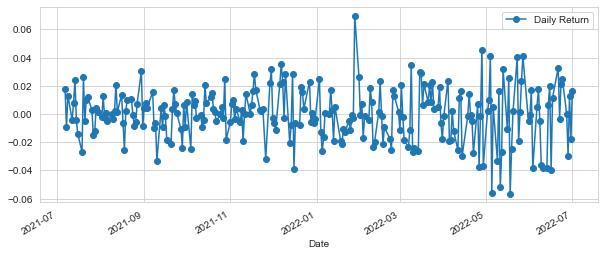

In [65]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='-',marker='o')

C:\Users\abala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

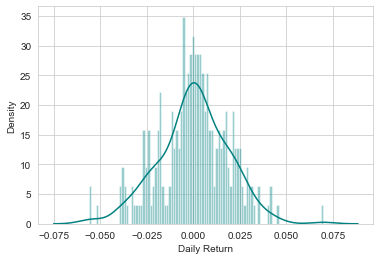

In [66]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='teal')

<AxesSubplot:>

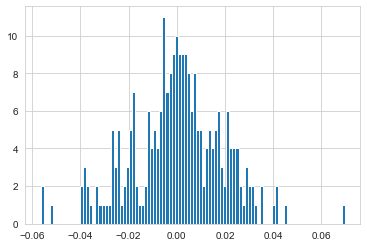

In [67]:
AAPL['Daily Return'].hist(bins=100)

In [68]:
from pandas_datareader.data import DataReader
closing_df=DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [69]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-06,141.213211,2595.419922,275.411133,183.787003
2021-07-07,143.748734,2601.550049,277.662720,184.828995
2021-07-08,142.426300,2583.540039,275.173065,186.570496
2021-07-09,144.285675,2591.489990,275.688812,185.966995
2021-07-12,143.679123,2611.280029,275.073853,185.927505
...,...,...,...,...
2022-06-27,141.660004,2332.449951,264.890015,113.220001
2022-06-28,137.440002,2251.429932,256.480011,107.400002
2022-06-29,139.229996,2245.129883,260.260010,108.919998


In [70]:
tech_rets=closing_df.pct_change()
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-06,NaN,NaN,NaN,NaN
2021-07-07,0.017955,0.002362,0.008175,0.005670
2021-07-08,-0.009200,-0.006923,-0.008966,0.009422
2021-07-09,0.013055,0.003077,0.001874,-0.003235
2021-07-12,-0.004204,0.007637,-0.002231,-0.000212
...,...,...,...,...
2022-06-27,0.000000,-0.016159,-0.010497,-0.027821
2022-06-28,-0.029790,-0.034736,-0.031749,-0.051404
2022-06-29,0.013024,-0.002798,0.014738,0.014153


C:\Users\abala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


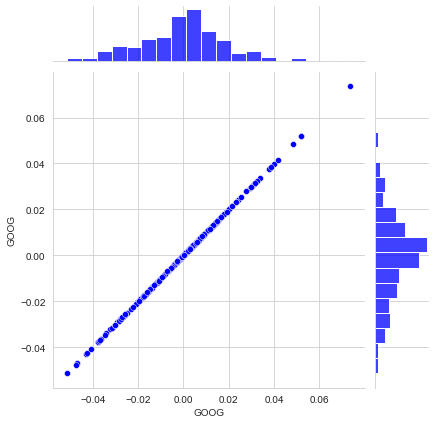

In [71]:
sns.jointplot('GOOG','GOOG',tech_rets,color='blue',kind='scatter')

C:\Users\abala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


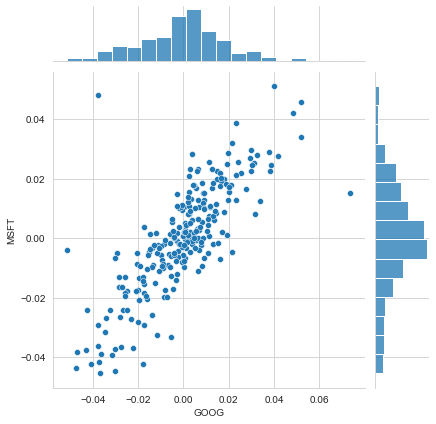

In [72]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',legend=True)

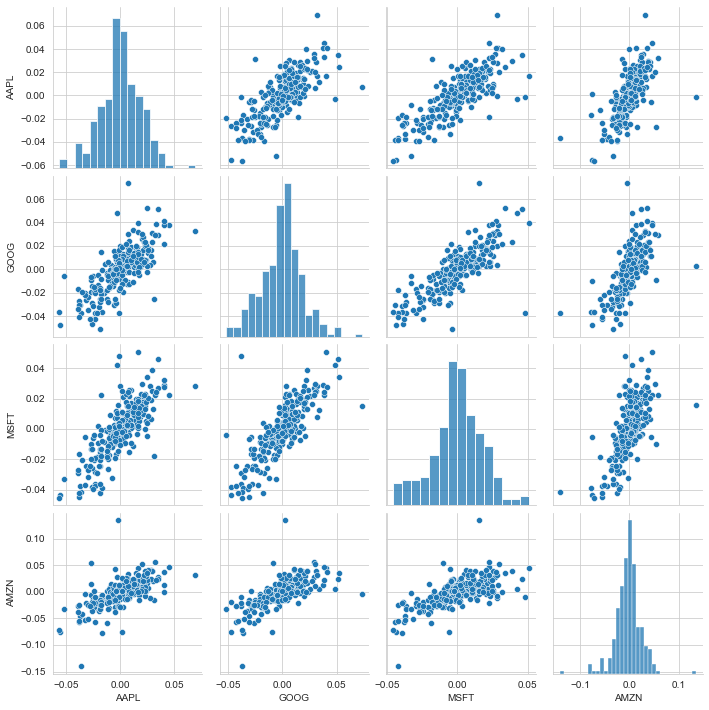

In [73]:
sns.pairplot(tech_rets.dropna())

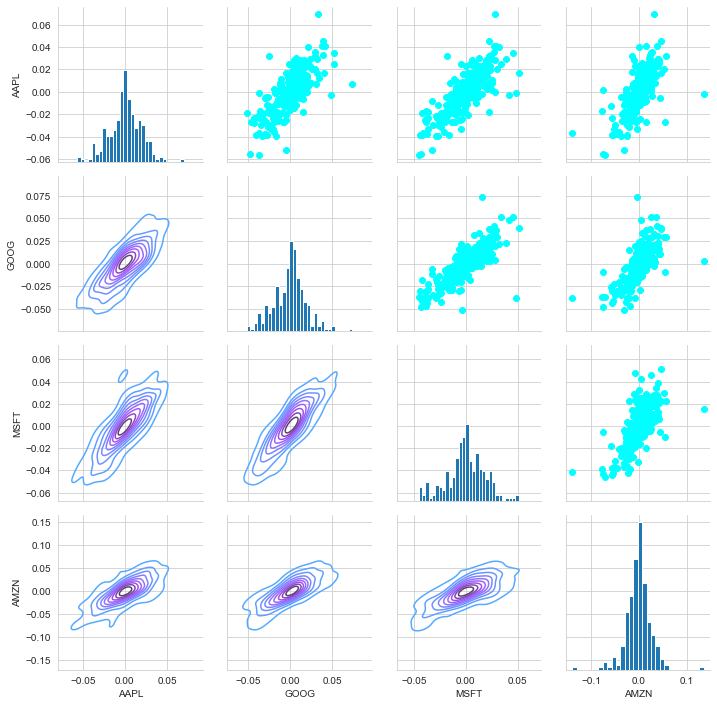

In [74]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='cyan')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


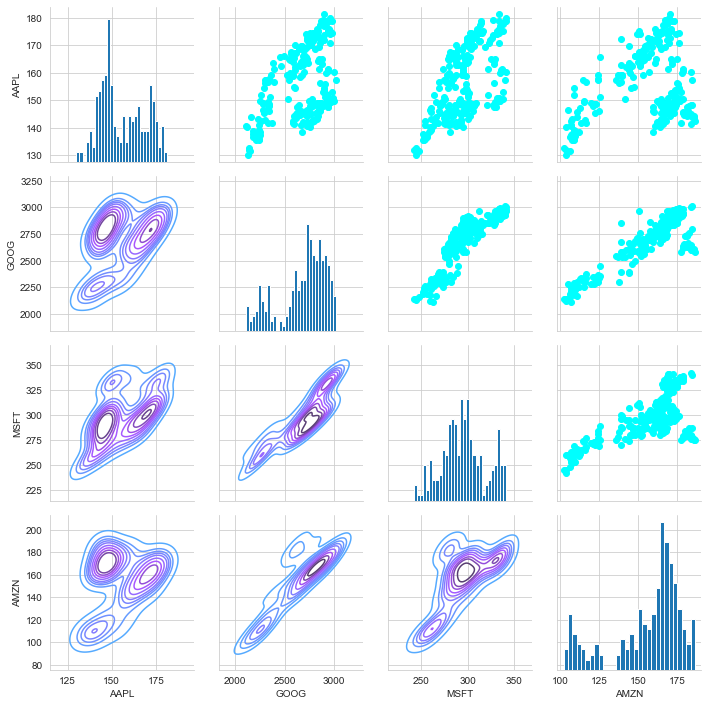

In [75]:
returns_fig=sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='cyan')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

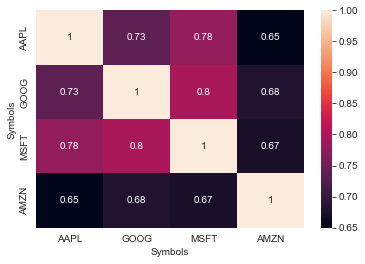

In [76]:
sns.heatmap(tech_rets.dropna().corr(), annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

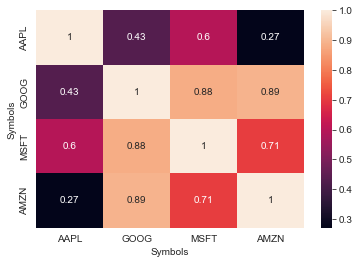

In [77]:
sns.heatmap(closing_df.corr(), annot=True)

In [78]:
rets=tech_rets.dropna()

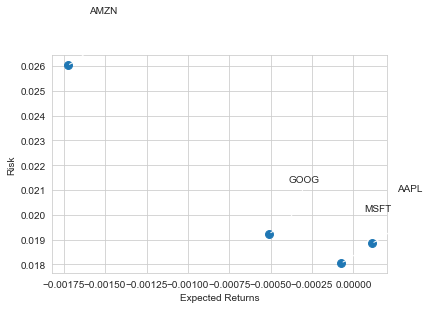

In [79]:
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel("Expected Returns")
plt.ylabel("Risk")
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

# Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns.

C:\Users\abala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

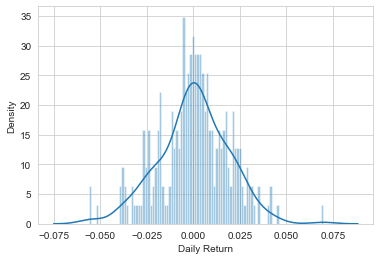

In [80]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

In [81]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-07,0.017955,0.002362,0.008175,0.005670
2021-07-08,-0.009200,-0.006923,-0.008966,0.009422
2021-07-09,0.013055,0.003077,0.001874,-0.003235
2021-07-12,-0.004204,0.007637,-0.002231,-0.000212
2021-07-13,0.007889,0.003297,0.013198,-0.011077


In [82]:
rets['AAPL'].quantile(0.05)

-0.03246132816778988

The 0.05 empirical quantile of daily returns is at -0.32. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.032 * 1,000,000 = $32,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

# Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

ΔSS=μΔt+σϵΔt−−−√
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

ΔS=S(μΔt+σϵΔt−−−√)
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG



In [83]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [87]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [88]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-06,2597.689941,2568.179932,2588.989990,2595.419922,1067500,2595.419922
2021-07-07,2612.798096,2595.199951,2606.820068,2601.550049,834000,2601.550049
2021-07-08,2600.649902,2560.800049,2565.000000,2583.540039,989000,2583.540039
2021-07-09,2596.989990,2578.870117,2578.889893,2591.489990,755300,2591.489990
2021-07-12,2615.399902,2592.000000,2596.669922,2611.280029,847200,2611.280029


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

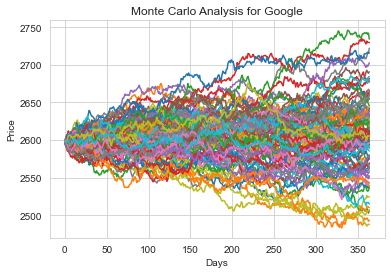

In [89]:
start_price = 2597.689941

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [91]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

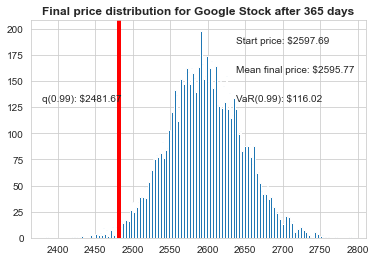

In [92]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');